These notebooks are used to compare a base and scenario, from expanded surveys or model outputs, in H5 format. To run: from the menu bar above, choose **Cell -> Run All ** or run lines individually. Use the toggle button below to hide/show the raw Python code.

## 

*Summaries:*
    - Day Activity Pattern
    - Number of Tours
---

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import os
import numpy as np
import pandas as pd
import h5py
import pylab as P
from IPython.display import display, display_pretty, Javascript, HTML
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Change working directory; only run this once since its a relative path change
default_path = r'../../../..'
os.chdir(default_path)

# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Load h5 or daysim outputs records
# Refering to 2 datasets as BASE and SCEN (scenario)

survey_loc = r'R:\SoundCast\estimation\2014\P5'

base = h5py.File(survey_loc + r'\survey14.h5','r+')
base_name = '2014 Survey'

# Note that expansion factor on daysim_outputs = 1 for each record, to allow direct comparison between survey records w/ exp. factor
scen = h5py.File(r'outputs\daysim_outputs.h5','r+')
scen_name = 'Daysim'

NameError: name 'base_run' is not defined

In [ ]:
def build_df(h5file, h5table, fields, nested=False):
    '''return all fields from h5 table'''
    data = {}
    for field in fields:
        if nested:
            data[field] = [i[0] for i in h5file[h5table][field][:]]
        else:   
            data[field] = [i for i in h5file[h5table][field][:]]
        
    return pd.DataFrame(data)

In [ ]:
# Load trip, person, and household files from h5 files

In [ ]:
trip_fields = ['dorp','dtaz','otaz','opurp','dpurp','mode','dpcl','opcl','arrtm','deptm','travdist','trexpfac']
trip_base = build_df(h5file=base, h5table='Trip', fields=trip_fields)
trip_scen = build_df(h5file=scen, h5table='Trip', fields=trip_fields)

In [ ]:
person_fields = ['hhno','pno','ptpass','pwautime','pwaudist','pwtyp','pstyp','pwtaz','pstaz','pagey','pptyp','psexpfac']
person_scen = build_df(h5file=scen, h5table='Person', fields=person_fields)
person_base = build_df(h5file=base, h5table='Person', fields=person_fields)

In [ ]:
# Create unique ID for person by concatenating household ID and person number 
person_scen['personID'] = (person_scen['Household ID'].astype('str')+person_scen['Person Number'].astype('str')).astype('int')
person_base['personID'] = (person_base['Household ID'].astype('str')+person_base['Person Number'].astype('str')).astype('int')

In [ ]:
hh_fields = ['hhno','hhsize','hhvehs','hhwkrs','hhincome','hhtaz','hhexpfac']
hh_scen = build_df(h5file=scen, h5table='Household', fields=hh_fields)
hh_base = build_df(h5file=base, h5table='Household', fields=hh_fields)

In [ ]:
hh_scen = build_df(h5file=scen, h5table='Household', var_dict=hhdict, nested=False)
hh_base = build_df(h5file=base, h5table='Household', var_dict=hhdict, nested=False)

In [ ]:
# Join household records to person records
hh_per_scen = pd.merge(left=person_scen, right=hh_scen,on='hhno',suffixes=('_p','_h'))
hh_per_base = pd.merge(left=person_base, right=hh_base,on='hhno',suffixes=('_p','_h'))

In [ ]:
# Join household geography
taz_geog = pd.read_csv(r'scripts/summarize/inputs/calibration/TAZ_TAD_County.csv')
taz_geog.reindex
hh_per_scen_home_geog = pd.merge(hh_per_scen, taz_geog, left_on='hhtaz', right_on='TAZ')
hh_per_base_home_geog = pd.merge(hh_per_base, taz_geog, left_on='hhtaz', right_on='TAZ')

In [ ]:
# Join workplace geography
hh_per_scen_work_geog = pd.merge(hh_per_scen, taz_geog, left_on='pwtaz', right_on='TAZ')
hh_per_base_work_geog = pd.merge(hh_per_base, taz_geog, left_on='pwtaz', right_on='TAZ')

In [ ]:
# Set some formatting options
pd.options.display.float_format = '{:.1f}%'.format    # set float format as percent, until further notice

----

# VMT

In [18]:
# Read network summary from latest run
net_sum_scen = pd.read_excel(r'R:\SoundCast\releases\TransportationFutures2010\outputs\network_summary_detailed.xlsx', 
                        sheetname ='Network Summary')
net_sum_base = pd.read_excel(r'R:\SoundCast\releases\soundcast_release_c1\outputs\network_summary_detailed.xlsx',
                            sheetname='Network Summary')

In [20]:
# delete first empty row
net_sum_scen.drop('tod', inplace=True)
net_sum_base.drop('tod', inplace=True)

In [25]:
df = pd.DataFrame([net_sum_base['arterial_vmt'],net_sum_scen['arterial_vmt']]).T
df.columns = [scen_name,base_name]

IndexError: ('arrays used as indices must be of integer (or boolean) type', u'occurred at index Daysim')

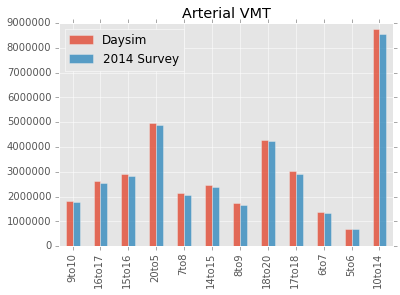

In [31]:
df.plot(kind='bar', alpha=0.8, title='Arterial VMT')

In [23]:
# Report VMT using skims and trip data
trip_scen[trip_scen['Travel Distance'] > 0].sum()['Expansion Factor']

15386970.0

In [25]:
trip_scen

,Departure Time,Expansion Factor,Household ID,Mode,Person Number,Purpose,Travel Cost,Travel Distance,Travel Time
0,916,1,1415445,3,1,4,1.708000,17.080000,31.080000
1,1060,1,1415445,4,1,0,1.708000,17.080000,31.340000
2,814,1,424160,4,1,6,0.191220,1.912200,7.154266
3,944,1,424160,4,1,0,0.191220,1.912200,7.483955
4,954,1,483970,3,1,5,0.293725,2.937249,8.912339
5,108,1,483970,3,1,0,0.293725,2.937249,8.811748
6,679,1,483970,3,2,1,0.717000,7.170000,16.960000
7,1243,1,483970,3,2,5,0.160625,1.606255,8.077966
8,1272,1,483970,3,2,0,0.723000,7.230000,16.600000
9,1035,1,365349,3,1,4,0.973000,9.730000,23.180000


---

## Tours Taken

---